## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
df = pd.read_csv('digits.csv')
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Drop Label Column

In [3]:
pixels_df = df.drop('number_label', axis=1)
pixels_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Displaying an Image

In [4]:
single_image = pixels_df.iloc[0]
single_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

### Convert to NumPy Array

In [5]:
single_image.to_numpy()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
single_image.to_numpy().shape

(64,)

In [7]:
single_number = single_image.to_numpy().reshape(8,8)
single_number

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Visualize Number

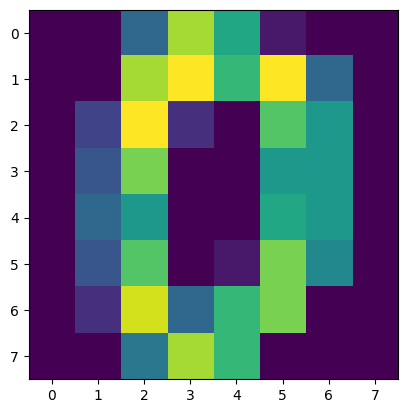

In [8]:
plt.imshow(single_number, cmap='viridis')

<Axes: >

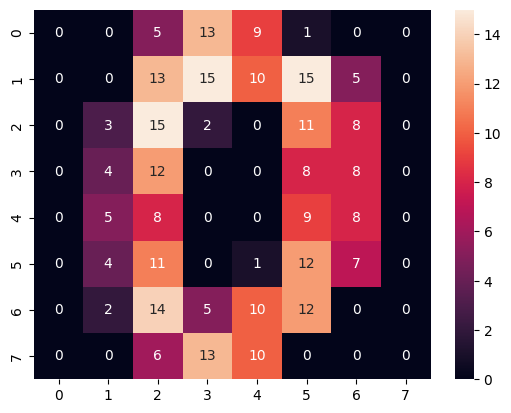

In [9]:
sns.heatmap(single_number, annot=True)

## Standardization

In [10]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [11]:
scaled_X.mean()

np.float64(2.7374190410688334e-18)

In [12]:
scaled_X.mean(axis=0)

array([ 0.00000000e+00, -3.55864475e-17,  3.16323978e-17,  3.95404973e-17,
       -2.57013232e-17, -5.93107459e-17, -4.74485967e-17,  3.16323978e-17,
       -2.37242984e-17, -3.16323978e-17,  3.55864475e-17, -3.95404973e-17,
        1.10713392e-16, -4.74485967e-17, -2.37242984e-17, -1.97702486e-17,
       -7.90809945e-18, -1.97702486e-17,  7.71039697e-17, -3.55864475e-17,
       -1.97702486e-17,  5.14026464e-17, -7.31499199e-17,  1.38391740e-17,
        1.48276865e-17, -4.74485967e-17,  0.00000000e+00, -2.76783481e-17,
        1.18621492e-17, -1.97702486e-17,  7.90809945e-18,  1.58161989e-17,
        0.00000000e+00,  1.10713392e-16, -2.37242984e-17, -3.95404973e-17,
       -7.90809945e-17,  2.47128108e-17, -1.58161989e-17,  0.00000000e+00,
       -4.94256216e-18, -4.74485967e-17,  3.95404973e-18,  1.06759343e-16,
        3.16323978e-17, -5.93107459e-17,  7.90809945e-17,  0.00000000e+00,
        8.89661188e-18,  9.88512431e-18,  2.76783481e-17,  3.16323978e-17,
        7.90809945e-17,  

## Principal Component Analysis

In [13]:
model = PCA(n_components=2)

In [14]:
model_pixels = model.fit_transform(scaled_X)
model_pixels

array([[-1.91175004, -1.05780607],
       [-0.58719333,  0.63673953],
       [-1.30013588, -0.53901086],
       ...,
       [-1.02392727, -0.07467477],
       [-1.07841738, -0.09541136],
       [ 1.25688657, -2.04380403]])

### Variance Explained

In [15]:
np.sum(model.explained_variance_ratio_)

np.float64(0.2135029148513411)

## Visualization

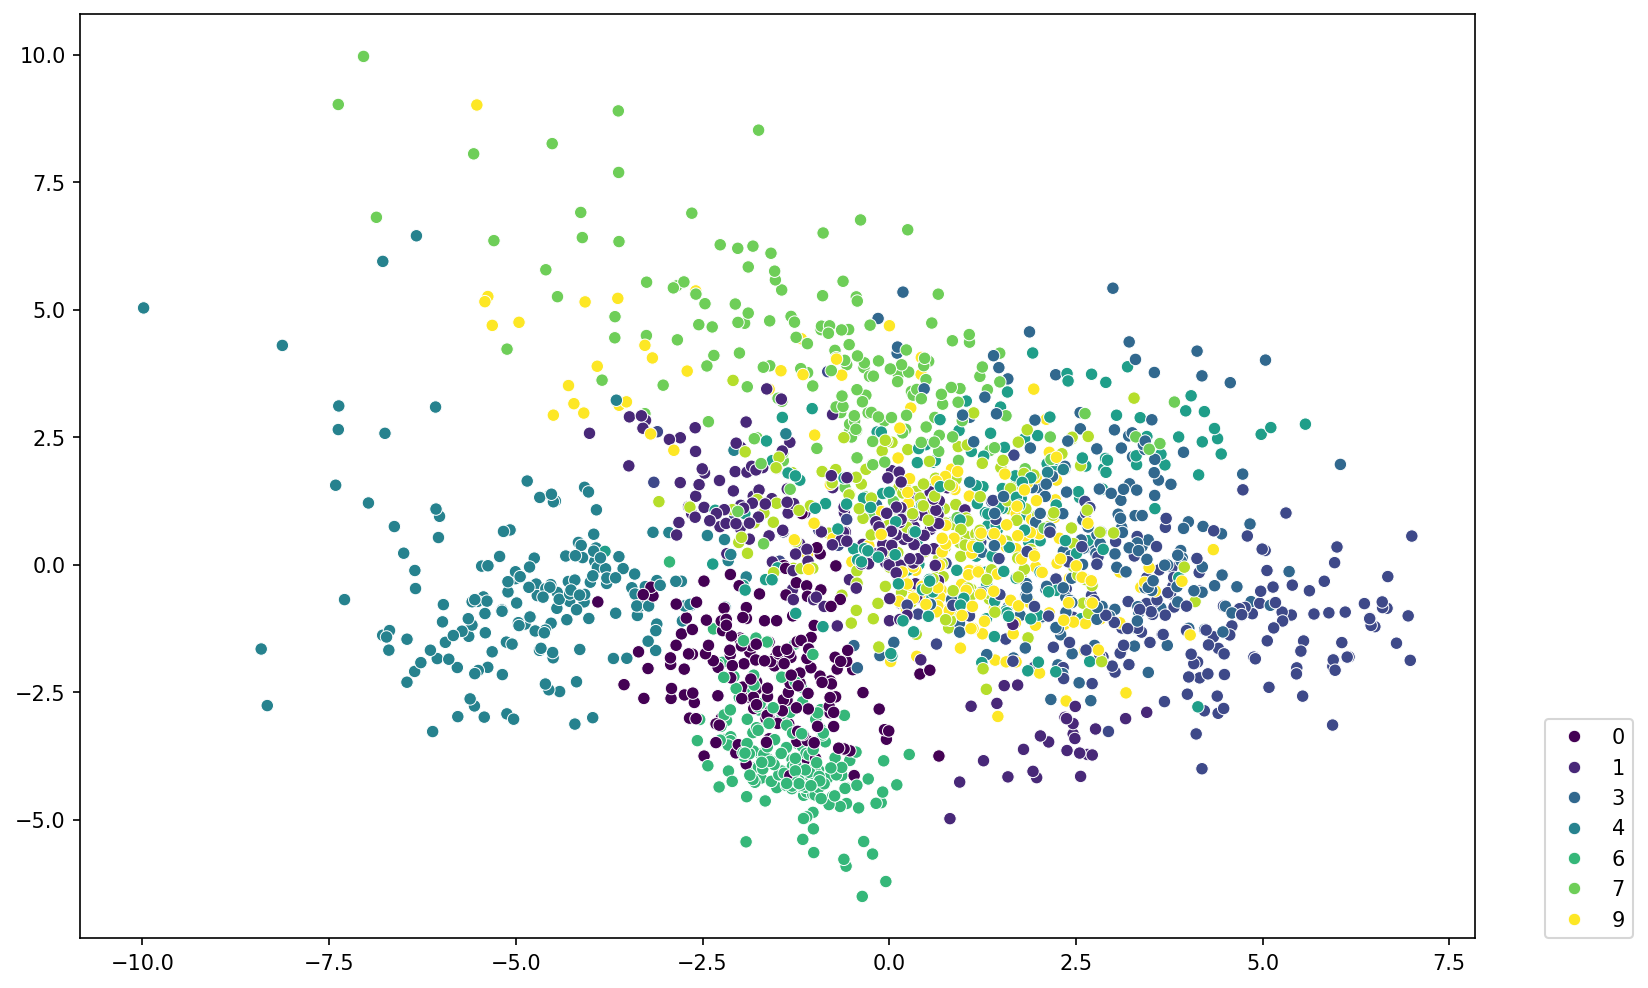

In [16]:
plt.figure(figsize=(12, 8), dpi=150)
sns.scatterplot(
    x=model_pixels[:, 0],
    y=model_pixels[:,1],
    hue=df['number_label'].values,
    palette='viridis'
)
plt.legend(loc=(1.05,0))
plt.show()